# Appendix file

### Configuration

In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
set_session(sess)

Using TensorFlow backend.


## 1. Arbitrary simple NN

### Importing modules and dataset

In [2]:
import numpy as np
from numpy.random import seed,randint,choice
seed(1)
from tensorflow import set_random_seed
set_random_seed(10)
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
print("Shape of X_train is: {}".format(X_train.shape))
print("Shape of X_test is: {}".format(X_test.shape))

Shape of X_train is: (60000, 28, 28)
Shape of X_test is: (10000, 28, 28)


### Preprocessing

In [5]:
X_train = X_train.astype(np.float32)/255.
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.astype(np.float32)/255.
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print("Shape of X_train is: {}".format(X_train.shape))
print("Shape of X_test is: {}".format(X_test.shape))

Shape of X_train is: (60000, 784)
Shape of X_test is: (10000, 784)


In [6]:
y_train = to_categorical(y_train,len(set(y_train)))
y_test = to_categorical(y_test,len(set(y_test)))

In [7]:
epochs = 20
batch = 256
activ_func_list = ['sigmoid','tanh','relu','elu']

### Model building and fitting

In [8]:
def build_nn(activation_type,optimizer):
    model = Sequential()
    model.add(Dense(500,activation=activation_type,input_shape=(784,)))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model
def hist_gen(hist):
    loss = [hist.history['loss'],hist.history['val_loss']]
    acc = [hist.history['acc'],hist.history['val_acc']]
    return loss, acc

In [9]:
nn_sigmoid = build_nn('sigmoid','sgd')
nn_tanh = build_nn('tanh','sgd')
nn_relu = build_nn('relu','sgd')
nn_elu = build_nn('elu','sgd')

In [10]:
hist_sigmoid = nn_sigmoid.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0,)
hist_tanh = nn_tanh.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)
hist_relu = nn_relu.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)
hist_elu = nn_elu.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)

### Training evaluation

In [11]:
(loss_sigmoid,acc_sigmoid) = hist_gen(hist_sigmoid)
(loss_tanh,acc_tanh) = hist_gen(hist_tanh)
(loss_relu,acc_relu) = hist_gen(hist_relu)
(loss_elu,acc_elu) = hist_gen(hist_elu)
loss_list = [loss_sigmoid,loss_tanh,loss_relu,loss_elu]
acc_list = [acc_sigmoid,acc_tanh,acc_relu,acc_elu]

In [12]:
fig, axes = plt.subplots(1,2,figsize = (15,3),dpi=1200)
fig.suptitle("Training")
for ax,vals,subtitle in zip(axes,(loss_list,acc_list),['loss','accuracy']):
    for val,func_name in zip(vals,activ_func_list):
        ax.plot(val[0],label=func_name)
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(subtitle)
        ax.set_title(subtitle)
fig, axes = plt.subplots(1,2,figsize = (15,3),dpi=1200)
fig.suptitle("Validation")
for ax,vals,subtitle in zip(axes,(loss_list,acc_list),['loss','accuracy']):
    for val,func_name in zip(vals,activ_func_list):
        ax.plot(val[1],label=func_name)
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(subtitle)
        ax.set_title(subtitle)

### Model evaluation on test set

In [13]:
print("nn_sigmoid:: Accuracy on the test set: {}".format(nn_sigmoid.evaluate(X_test,y_test,verbose=0)[1]))
print("nn_tanh:: Accuracy on the test set: {}".format(nn_tanh.evaluate(X_test,y_test,verbose=0)[1]))
print("nn_relu:: Accuracy on the test set: {}".format(nn_relu.evaluate(X_test,y_test,verbose=0)[1]))
print("nn_elu:: Accuracy on the test set: {}".format(nn_elu.evaluate(X_test,y_test,verbose=0)[1]))

nn_sigmoid:: Accuracy on the test set: 0.0974
nn_tanh:: Accuracy on the test set: 0.9446
nn_relu:: Accuracy on the test set: 0.9489
nn_elu:: Accuracy on the test set: 0.9539


### Wrongly classified examples by the simple NN model

In [14]:
true = np.argmax(y_test,axis=1)
pred = np.argmax(nn_elu.predict(X_test),axis=1)
n = 7 # display 7 examples
wrong_prediction_index = np.nonzero(pred != true)[0]
wrong_idxes = np.random.choice(wrong_prediction_index,n,replace=False)

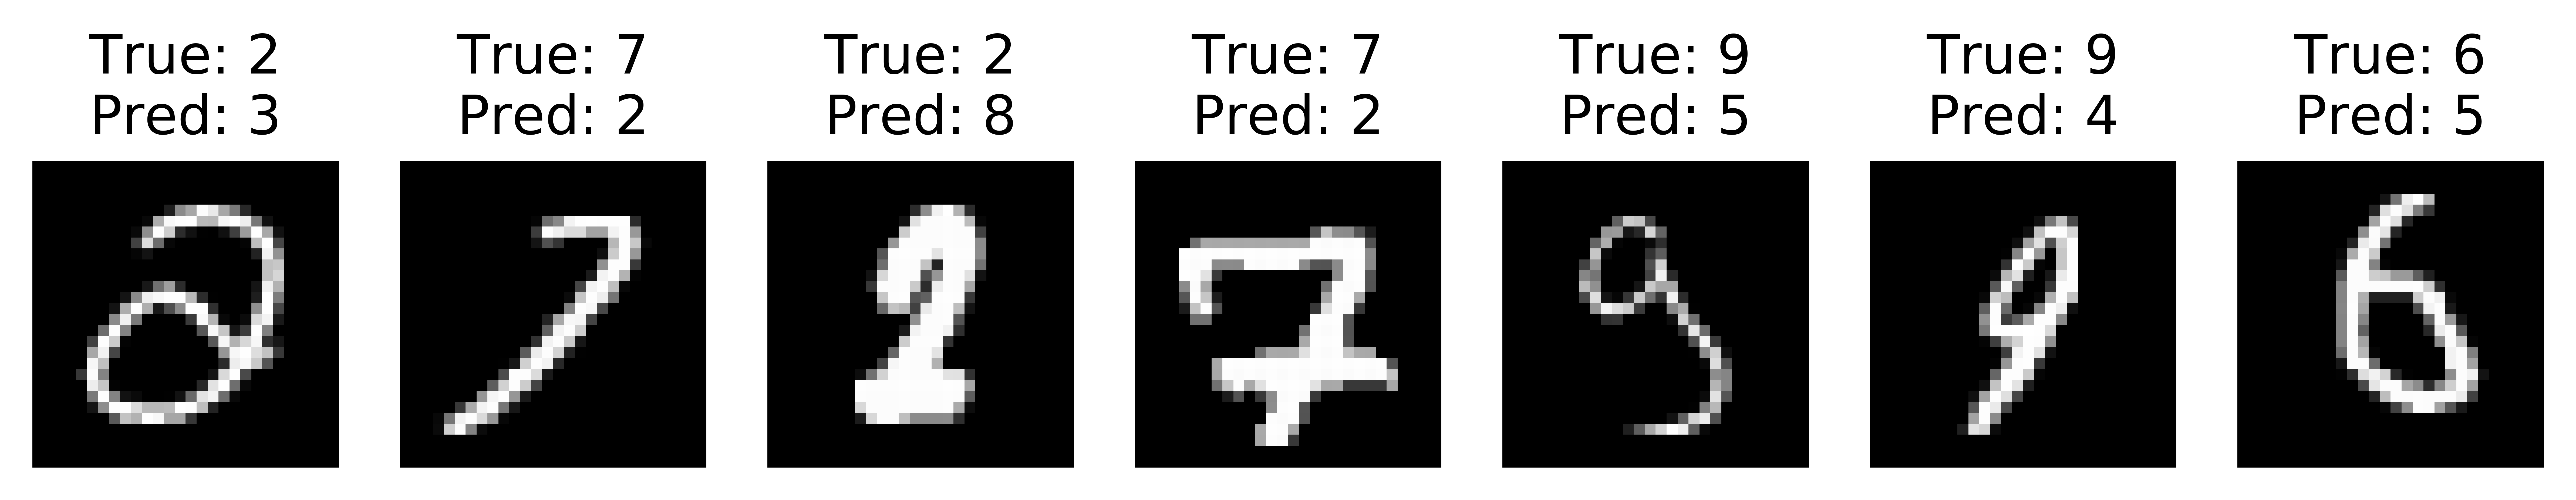

In [15]:
X_test = X_test.reshape(10000,28,28) # to reconstruct the image
fig,axes = plt.subplots(1,n,figsize=(10,10),dpi=1200)
for ax,wrong_idx in zip(axes,wrong_idxes):
    ax.imshow(X_test[wrong_idx,:,:],cmap='gray')
    ax.axis('off')
    ax.set_title('True: {}\nPred: {}'.format(true[wrong_idx],pred[wrong_idx]))


## 2. Arbitrary simple CNN

### Importing additional modules required for CNN

In [16]:
from keras.layers import Conv2D, Flatten

### Re-importing dataset and preprocessing

In [17]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)
print("Shape of X_train is: {}".format(X_train.shape))
print("Shape of X_test is: {}".format(X_test.shape))
X_train = X_train.astype(np.float32)/255.
X_test = X_test.astype(np.float32)/255.
y_train = to_categorical(y_train,len(set(y_train)))
y_test = to_categorical(y_test,len(set(y_test)))

Shape of X_train is: (60000, 28, 28, 1)
Shape of X_test is: (10000, 28, 28, 1)


### Model building and fitting

In [18]:
def build_cnn(activation_type,optimizer):
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding='same',activation=activation_type,input_shape=X_train[0].shape))
    model.add(Conv2D(32,(3,3),padding='same',activation=activation_type))
    model.add(Conv2D(64,(3,3),padding='same',activation=activation_type))
    model.add(Conv2D(64,(3,3),padding='same',activation=activation_type))
    model.add(Flatten())
    model.add(Dense(128,activation=activation_type))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [19]:
cnn_sigmoid = build_cnn('sigmoid','sgd')
cnn_tanh = build_cnn('tanh','sgd')
cnn_relu = build_cnn('relu','sgd')
cnn_elu = build_cnn('elu','sgd')

In [20]:
hist_sigmoid_cnn = cnn_sigmoid.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)
hist_tanh_cnn = cnn_tanh.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)
hist_relu_cnn = cnn_relu.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)
hist_elu_cnn = cnn_elu.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)

### Training evaluation

In [21]:
(loss_sigmoid,acc_sigmoid) = hist_gen(hist_sigmoid_cnn)
(loss_tanh,acc_tanh) = hist_gen(hist_tanh_cnn)
(loss_relu,acc_relu) = hist_gen(hist_relu_cnn)
(loss_elu,acc_elu) = hist_gen(hist_elu_cnn)
loss_list_cnn = [loss_sigmoid,loss_tanh,loss_relu,loss_elu]
acc_list_cnn = [acc_sigmoid,acc_tanh,acc_relu,acc_elu]

In [22]:
fig, axes = plt.subplots(1,2,figsize = (15,3),dpi=1200)
fig.suptitle("Training")
for ax,vals,subtitle in zip(axes,(loss_list_cnn,acc_list_cnn),['loss','accuracy']):
    for val,func_name in zip(vals,activ_func_list):
        ax.plot(val[0],label=func_name)
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(subtitle)
        ax.set_title(subtitle)
fig, axes = plt.subplots(1,2,figsize = (15,3),dpi=1200)
fig.suptitle("Validation")
for ax,vals,subtitle in zip(axes,(loss_list_cnn,acc_list_cnn),['loss','accuracy']):
    for val,func_name in zip(vals,activ_func_list):
        ax.plot(val[1],label=func_name)
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(subtitle)
        ax.set_title(subtitle)

### Model evaluation on test set

In [23]:
print("cnn_sigmoid:: Accuracy on the test set: {}".format(cnn_sigmoid.evaluate(X_test,y_test,verbose=0)[1]))
print("cnn_tanh:: Accuracy on the test set: {}".format(cnn_tanh.evaluate(X_test,y_test,verbose=0)[1]))
print("cnn_relu:: Accuracy on the test set: {}".format(cnn_relu.evaluate(X_test,y_test,verbose=0)[1]))
print("cnn_elu:: Accuracy on the test set: {}".format(cnn_elu.evaluate(X_test,y_test,verbose=0)[1]))

cnn_sigmoid:: Accuracy on the test set: 0.1135
cnn_tanh:: Accuracy on the test set: 0.9726
cnn_relu:: Accuracy on the test set: 0.9783
cnn_elu:: Accuracy on the test set: 0.9738


### Wrongly classified examples by the simple CNN model

In [24]:
pred_cnn = np.argmax(cnn_elu.predict(X_test),axis=1)
wrong_prediction_index_cnn = np.nonzero(pred_cnn != true)[0]
wrong_idxes_cnn = np.random.choice(wrong_prediction_index_cnn,n,replace=False)

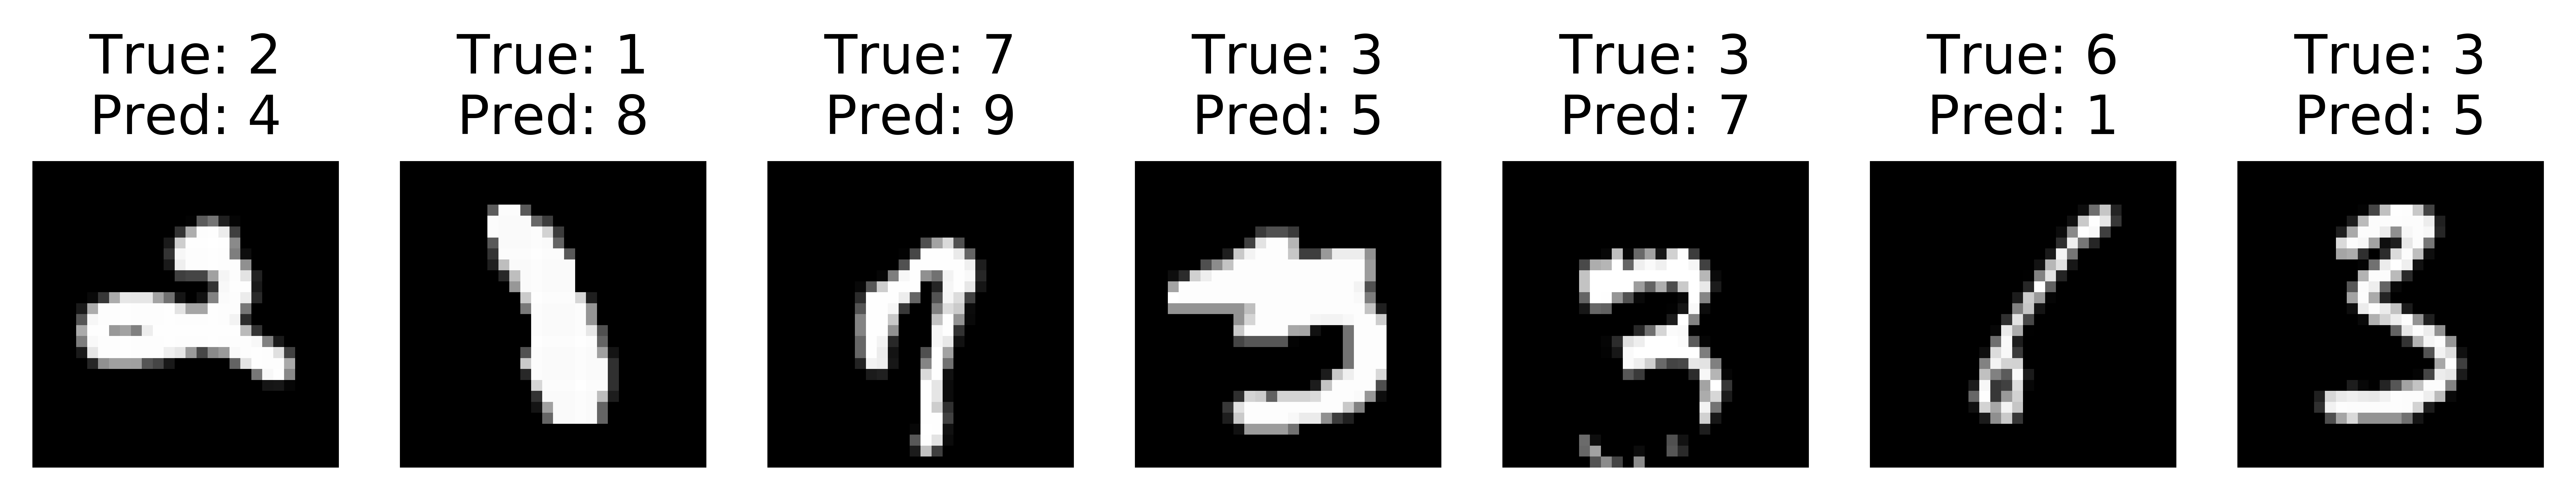

In [25]:
fig,axes = plt.subplots(1,n,figsize=(10,10),dpi=1200)
for ax,wrong_idx in zip(axes,wrong_idxes_cnn):
    ax.imshow(X_test[wrong_idx,:,:,0],cmap='gray')
    ax.axis('off')
    ax.set_title('True: {}\nPred: {}'.format(true[wrong_idx],pred_cnn[wrong_idx]))


### Optional: how did the CNN do on the wrongly classified examples by the simple NN model?

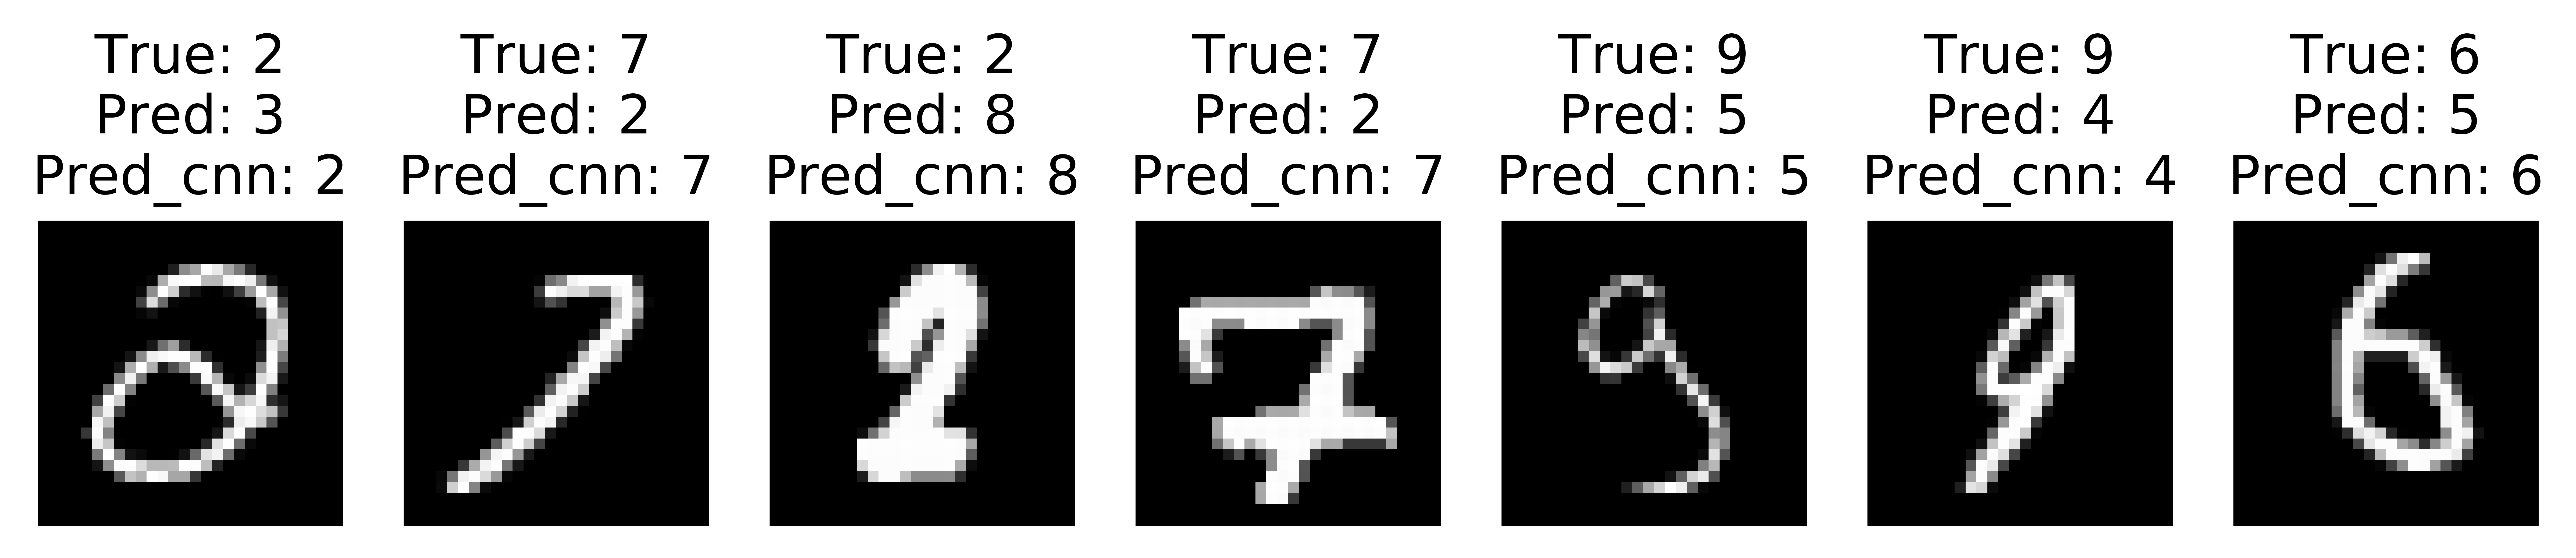

In [26]:
fig,axes = plt.subplots(1,n,figsize=(10,10),dpi=1200)
for ax,wrong_idx in zip(axes,wrong_idxes):
    ax.imshow(X_test[wrong_idx,:,:,0],cmap='gray')
    ax.axis('off')
    ax.set_title('True: {}\nPred: {}\nPred_cnn: {}'.format(true[wrong_idx],pred[wrong_idx],pred_cnn[wrong_idx]))
